## Sección 1 - Configuración

Primero, necesitamos realizar una conexión con nuestra carpeta de Google Drive para acceder a los archivos de datos CSV.
Además importamos las librerias a utilizar.

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#cargamos los datos
contenido = pd.read_csv("/content/drive/MyDrive/PRE-PROFESIONAL/THE FORAGE - ACCENTURE/Content.csv")
tipo_reaccion = pd.read_csv("/content/drive/MyDrive/PRE-PROFESIONAL/THE FORAGE - ACCENTURE/ReactionTypes.csv")
reaccion = pd.read_csv("/content/drive/MyDrive/PRE-PROFESIONAL/THE FORAGE - ACCENTURE/Reactions.csv")


#Antes de comenzar a trabajar con los conjuntos de datos, debemos asegurarnos de que los datos estén limpios y listos para el análisis.

##Primero vamos a visualizar el dataframe que hemos asignado en la variable "contenido"

In [27]:
contenido.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [28]:
#Vamos a ver las columnas de nuestro Dataframe
contenido.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [29]:
# Nos damos cuenta que hay columnas que no aportan valor , por ello vamos a eliminarlas
contenido_1 = contenido.drop(["Unnamed: 0" , "User ID", "URL" ] , axis =1 )

#Renombramos la columna "Type"
contenido_1.rename(columns = {'Type':'Content Type'}, inplace = True)
contenido_1

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [30]:
#Hacemos un conteo de los valores de la columna "Category"
contenido_1["Category"].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

In [31]:
#Nos damos cuenta que hay valores  que practicamente significan lo mismo pero lo considera como otro dato ,
#y eso es porque esta entre comillas dobles , asi que debemos de elimanr esas cominllas y poner todo los datos en minusculas.


#Primero eliminamos la columan "Category"
new_contenido = contenido_1.drop(["Category"], axis=1)
new_contenido

,Content ID,Content Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo
4,01ab84dd-6364-4236-abbb-3f237db77180,video
...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF


In [32]:
#creamo un alista vacia que usaremos para crear la nueva columan con lo datos correctos.
new_category = []


for string in contenido_1["Category"]:

    original_string = string
    # Removemos el caracter '"' y lo reemplazamos  por un espacio vacío ' '
    new_string = original_string.replace('"', '')
    # Hacemos que todos los tring esten en minuscula
    new_string_minus = new_string.lower()

    #cada string los agregamos a una lista vacia que creamos inicialmente
    new_category.append(new_string_minus)

#creamos la nueva columna con los datos de la lista
new_contenido["New Category"] = new_category
new_contenido


,Content ID,Content Type,New Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [33]:
#Contar la cantidad de valores para cada uno , y ahora si tenemos valores unicos
new_contenido["New Category"].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: New Category, dtype: int64

In [34]:
#vemos si hay valores nulos
new_contenido.isnull().sum()

# nos indica que no hay valores nulos.

Content ID      0
Content Type    0
New Category    0
dtype: int64

## Visualizamos el dataframe que hemos asignado en la variable "reaccion"

In [35]:
reaccion.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [36]:
#Visualizamos las columnas del dataframe
reaccion.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [37]:
#eliminamos las coluumnas que no aportan valor
reaccion_1 = reaccion.drop(["Unnamed: 0","User ID"] , axis =1)

# y remobramos la columna "Type"
reaccion_1.rename(columns = {'Type':'Reaction Type'}, inplace = True)
reaccion_1

,Content ID,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [38]:
#vemos si hay valores nulos
reaccion_1.isnull().sum()


Content ID         0
Reaction Type    980
Datetime           0
dtype: int64

In [39]:
# eliminando los valores nulos
reaccion_clean = reaccion_1.dropna()
reaccion_clean

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [40]:
#ahora ya no hay valores nulos
reaccion_clean.isnull().sum()

Content ID       0
Reaction Type    0
Datetime         0
dtype: int64

## Visualizamos el dataframe que hemso asignado en la variable "tipo_reaccion"

In [41]:
tipo_reaccion

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [42]:
#seleccionammos todas las columnas excepto la primera
tipo_reaccion_1 = tipo_reaccion.iloc[ : , 1:4]

#renombramos la columna "Type"
tipo_reaccion_1.rename(columns = {"Type" : "Reaction Type"} , inplace = True)
tipo_reaccion_1



,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [43]:
# Con los nuevos dataframes limpios


#new_contenido
#reaccion_clean
tipo_reaccion_1

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [44]:
#unimos los 3 dataframe

tabla_1_2=pd.merge(reaccion_clean, new_contenido , on = "Content ID")
tabla_final = pd.merge(tabla_1_2 , tipo_reaccion_1 , on = "Reaction Type")
tabla_final

,Content ID,Reaction Type,Datetime,Content Type,New Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [45]:
tabla_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   New Category   24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [46]:
#exportando excel de la data limpia
tabla_final.to_excel("datalimpia.xlsx")

In [47]:
#la suma de puntajes por cada categoria
df = tabla_final.groupby("New Category")["Score"].sum()

Top = df.sort_values(ascending = False)

Top5 = pd.DataFrame( Top)

Categorias_Top = Top5.head()
Categorias_Top

,Score
New Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [48]:
#exportando excel del TOP 5  de las categorias
Categorias_Top.to_excel("Top5.xlsx")

# GRÁFICOS

 Preguntas a considerar:

*   ¿Cuántas categorías únicas hay?
*   ¿Cuántas reacciones tiene la categoría más popular?
*   ¿Cuál fue el mes con más publicaciones?

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico de pastel del Top 5 de categorías

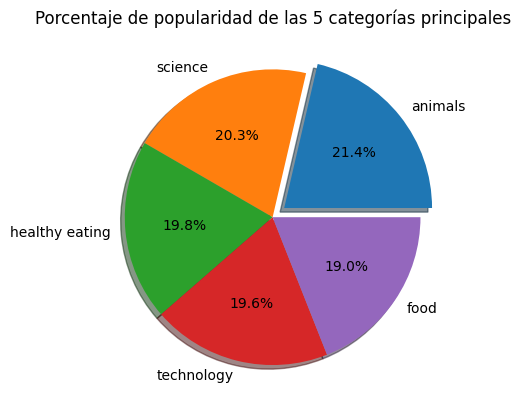

In [50]:

# Obtén los valores de las categorías y los valores numéricos correspondientes
categorias = Categorias_Top.index.tolist()
valores = Categorias_Top['Score'].tolist()

# Encuentra el índice de la categoría de mayor valor
indice_max_valor = valores.index(max(valores))

# Crea una lista de desplazamiento para separar la porción de mayor valor
desplazamiento = [0] * len(categorias)
desplazamiento[indice_max_valor] = 0.1

# Crea el gráfico de pastel
plt.pie(valores, labels=categorias, explode=desplazamiento, autopct='%1.1f%%', shadow=True)

# Añade título
plt.title('Porcentaje de popularidad de las 5 categorías principales')

# Mostrar el gráfico
plt.show()



## Gráfico de barras horizontales de Top 5 de categorías

['animals', 'science', 'healthy eating', 'technology', 'food'] [74965, 71168, 69339, 68738, 66676]


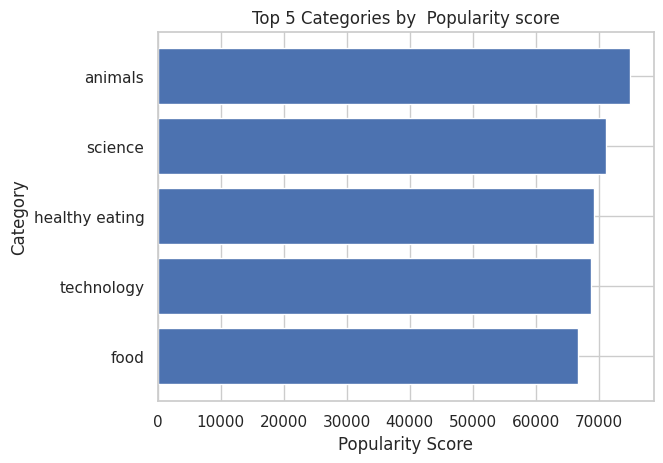

In [92]:
# Obtén los valores de las categorías y los valores numéricos correspondientes
categorias = Categorias_Top.index.tolist()
valores = Categorias_Top['Score'].tolist()
print(categorias , valores)
# Ordenar los datos de forma decreciente
datos_ordenados = sorted(zip(valores, categorias), reverse=False)
valores_ordenados, categorias_ordenadas = zip(*datos_ordenados)

# Crear el gráfico de barras horizontales
plt.barh(categorias_ordenadas, valores_ordenados)

# Añadir título y etiquetas de los ejes
plt.title("Top 5 Categories by  Popularity score")
plt.xlabel('Popularity Score')
plt.ylabel('Category')

# Mostrar el gráfico
plt.show()


## HALLANDO LA CANTIDAD DE REACCION PARA LA CATEGORÍA "animals"

In [52]:
tabla_final

,Content ID,Reaction Type,Datetime,Content Type,New Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


<BarContainer object of 16 artists>

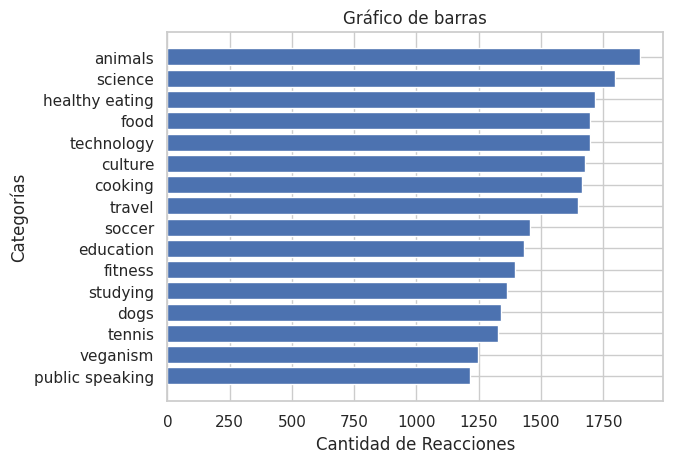

In [130]:
resultado_grupo = tabla_final.groupby("New Category")["Reaction Type"].count()

# Convertir el resultado en un DataFrame
df_resultado = resultado_grupo.reset_index()


# Obtén los valores de las categorías y los valores numéricos correspondientes
categorias = df_resultado["New Category"].tolist()
valores = df_resultado["Reaction Type"].tolist()

# Ordenar los datos de forma decreciente
datos_ordenados = sorted(zip(valores, categorias), reverse=False)
valores_ordenados, categorias_ordenadas = zip(*datos_ordenados)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Reacciones')
plt.ylabel('Categorías')
plt.title('Gráfico de barras')

# Crear el gráfico de barras horizontales
plt.barh(categorias_ordenadas, valores_ordenados)

### Mes con mas posts para "Animals"

In [65]:
tabla_final['Datetime'] = pd.to_datetime(tabla_final['Datetime'])  # convertimos la columna de tipo objeto a tipo datatime


In [ ]:
meses = tabla_final['Datetime'].dt.month_name()
# extraemos los meses


In [66]:
meses


0         November
1          January
2            April
3            March
4           August
           ...    
24568      October
24569    September
24570      October
24571         June
24572     December
Name: Datetime, Length: 24573, dtype: object

In [134]:
df_meses = meses.value_counts(ascending = False).reset_index()
df_meses
# En el mes de MAYO se a realizado mas posts

,index,Datetime
0,May,2138
1,January,2126
2,August,2114
3,December,2092
4,July,2070
5,October,2056
6,November,2034
7,September,2022
8,June,2021
9,March,2012


<BarContainer object of 12 artists>

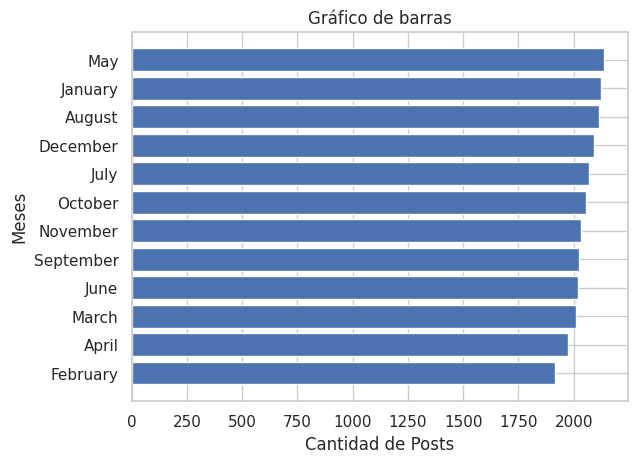

In [136]:
# Obtén los valores de las categorías y los valores numéricos correspondientes
meses = df_meses["index"].tolist()
valores = df_meses["Datetime"].tolist()

# Ordenar los datos de forma decreciente
datos_ordenados = sorted(zip(valores, meses), reverse=False)
valores_ordenados, categorias_ordenadas = zip(*datos_ordenados)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Posts')
plt.ylabel('Meses')
plt.title('Gráfico de barras')

# Crear el gráfico de barras horizontales
plt.barh(categorias_ordenadas, valores_ordenados)


#El mes con mayor pos es Mayo